# PECS PBL
####Performance Evaluation of Computing Systems 
[17M11CS122] \
####Topic: Experimental Designs (Project based Learning) 
##Dataset: Alzheimer Dataset 
###Members: 
1. Pranav Gupta (19803021)
2. Garvita Nagpal (19803019)
3. Sushrut Khajuria (22303001)


### Loading the dataset

In [ ]:
pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


{"username":"garvitanagpal","key":"7c16fd7f5e316c2d10c1e0548b513271"}

In [ ]:
import opendatasets as od
import pandas as pd
od.download("https://www.kaggle.com/datasets/brsdincer/alzheimer-features")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: garvitanagpal
Your Kaggle Key: ··········


100%|██████████| 4.32k/4.32k [00:00<00:00, 2.11MB/s]

Dataset Description ([Alzheimer features](https://www.kaggle.com/datasets/brsdincer/alzheimer-features))

1. Group --> Class
2.   Age --> Age
3.   EDUC --> Years of Education
4.   M/F --> Gender
5.   SES --> Socioeconomic Status / 1-5
6. MMSE --> Mini Mental State Examination
7. CDR --> Clinical Dementia Rating
8. eTIV --> Estimated total intracranial volume
9. nWBV --> Normalize Whole Brain Volume
10. ASF --> Atlas Scaling Factor

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Feature Reduction Using Logistic Regression

In [ ]:
data = pd.read_csv('/content/alzheimer-features/alzheimer.csv')
data.dropna(inplace=True)
data.head(10)
indexGroup = data[ (data['Group'] == 'Converted')].index
data.drop(indexGroup, inplace=True)

In [ ]:
data.head(10)

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,Nondemented,F,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,Nondemented,F,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,Nondemented,M,80,12,4.0,28.0,0.0,1689,0.712,1.039
8,Nondemented,M,83,12,4.0,29.0,0.5,1701,0.711,1.032
9,Nondemented,M,85,12,4.0,30.0,0.0,1699,0.705,1.033
13,Nondemented,F,93,14,2.0,30.0,0.0,1272,0.698,1.380
14,Nondemented,F,95,14,2.0,29.0,0.0,1257,0.703,1.396
15,Demented,M,68,12,2.0,27.0,0.5,1457,0.806,1.205


In [ ]:
feature_names = ["Age","EDUC","SES","MMSE","CDR", "eTIV", "nWBV", "ASF"]
for feature_name in feature_names:
    data[feature_name] = (data[feature_name]-data[feature_name].mean()) / data[feature_name].std()

In [ ]:
data.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,1.317594,-0.210170,-0.485925,-0.067810,-0.714052,2.745522,-0.907990,-2.209649
1,Nondemented,M,1.445715,-0.210170,-0.485925,0.709145,-0.714052,2.840114,-1.301670,-2.259770
5,Nondemented,F,1.445715,1.156475,0.404469,0.191175,-0.714052,-1.550071,-0.540555,1.807170
6,Nondemented,F,1.701959,1.156475,0.404469,-0.067810,-0.714052,-1.633534,-0.330592,1.936052
7,Nondemented,M,0.420741,-0.893492,1.294863,0.191175,-0.714052,1.087379,-0.488064,-1.092673


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0).fit(data[feature_names].values, data['Group'].values)
score = model.score(data[feature_names].values, data['Group'].values)
print(score)
w0 = model.intercept_[0]
w = w1, w2, w3, w4, w5, w6, w7, w8 = model.coef_[0]
equation = "y = %f + (%f * x1) + (%f * x2) + (%f * x3) + (%f * x4)+ (%f * x5)+ (%f * x6)+ (%f * x7)+ (%f * x8)" % (w0, w1, w2, w3, w4,  w5, w6, w7, w8)
print(equation)

0.9936908517350158
y = 0.050999 + (0.617122 * x1) + (0.008590 * x2) + (0.058305 * x3) + (1.224994 * x4)+ (-4.620259 * x5)+ (0.276604 * x6)+ (0.603675 * x7)+ (-0.130784 * x8)


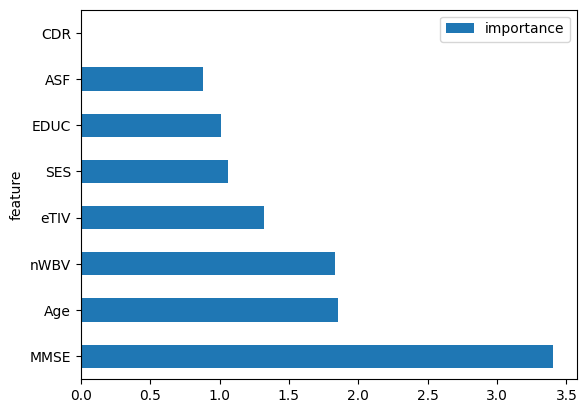

3    1.000000
0    0.544508
6    0.537235
5    0.387364
2    0.311396
1    0.296294
7    0.257747
4    0.002894
Name: importance, dtype: float64


In [ ]:
import math
feature_importance = pd.DataFrame(feature_names, columns = ["feature"])
feature_importance["importance"] = pow(math.e, w)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)
from sklearn.linear_model import LogisticRegression
ax = feature_importance.plot.barh(x='feature', y='importance')
plt.show()
print(feature_importance["importance"]/3.404147)

### Testing for categorical feature

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
X = data.values[:,1]
y = data.values[:,0]

In [ ]:
# X = X.astype('category')
# y = y.astype('category')

# Create an empty list to store the results of the chi-square test
chi2_results = []

# Loop through each feature column and calculate the chi-square statistic and p-value
contingency_table = pd.crosstab(X, y)
chi2, p_value, *_ = chi2_contingency(contingency_table)
chi2_results.append(('M/F', chi2, p_value))

# Convert the list of results into a DataFrame for easy manipulation
chi2_df = pd.DataFrame(chi2_results, columns=['Feature', 'Chi2', 'p-value'])

# Sort the DataFrame by p-value in ascending order
chi2_df.sort_values(by='p-value', ascending=True, inplace=True)

# Print the results
print(chi2_df)

  Feature       Chi2   p-value
0     M/F  22.747496  0.000002


The results, including the chi-square statistic and p-value, are stored in a DataFrame (chi2_df) and printed for further analysis. Note that a lower p-value indicates a stronger association between the feature i.e Gender and the target, making it a potentially better feature for selection.

Thus numerical features that are relevant are : MMSE, Age, nWBV. Thus drop the other irrelevant features.


### Generating y values for 4 feature dataset (FULL FACTORIAL)

In [ ]:
df = pd.read_csv('/content/alzheimer-features/alzheimer.csv')
df.dropna(inplace=True)
df.head(10)
indexGroup = df[ (df['Group'] == 'Converted')].index
df.drop(indexGroup , inplace=True)
# print(df.values[1:50])

In [ ]:
df.drop(['SES', 'EDUC', 'ASF', 'CDR', 'eTIV'], axis=1, inplace=True)

In [ ]:
df.describe().T #ASG

,count,mean,std,min,25%,50%,75%,max
Age,317.0,76.716088,7.805071,60.000,71.0,76.000,82.000,98.000
MMSE,317.0,27.261830,3.861227,4.000,27.0,29.000,30.000,30.000
nWBV,317.0,0.730596,0.038102,0.644,0.7,0.732,0.757,0.837


In [ ]:
df.head(10) #ASG

,Group,M/F,Age,MMSE,nWBV
0,Nondemented,M,87,27.0,0.696
1,Nondemented,M,88,30.0,0.681
5,Nondemented,F,88,28.0,0.710
6,Nondemented,F,90,27.0,0.718
7,Nondemented,M,80,28.0,0.712
8,Nondemented,M,83,29.0,0.711
9,Nondemented,M,85,30.0,0.705
13,Nondemented,F,93,30.0,0.698
14,Nondemented,F,95,29.0,0.703
15,Demented,M,68,27.0,0.806


ENCODING DATA

In [ ]:
#CATEGORICAL FEATURES
#Encode Gender 
df.loc[df["Group"] == "Nondemented", "Group"] = 1 #nonDemented
df.loc[df["Group"] == "Demented", "Group"] = 0 #demented

#Encode Gender 
df.loc[df["M/F"] == "M", "M/F"] = 1 #Male
df.loc[df["M/F"] == "F", "M/F"] = 0 #Female

#NUMERICAL FEATURES
#encode Age
mean_age = df['Age'].mean()
print("Mean Age: ",round(mean_age, 2))
df.loc[df["Age"] < mean_age, "Age"] = 0 #ALTM age less than mean
df.loc[df["Age"] >= mean_age, "Age"] = 1 #AGTM

#encode MMSE
mean_MMSE = df['MMSE'].mean()
print("Mean MMSE: ",round(mean_MMSE, 2))
df.loc[df["MMSE"] < mean_MMSE, "MMSE"] = 0
df.loc[df["MMSE"] >= mean_MMSE, "MMSE"] = 1

#encode nWBV
mean_nWBV = df['nWBV'].mean()
print("Mean nWBV: ",round(mean_nWBV, 2))
df.loc[df["nWBV"] < mean_nWBV, "nWBV"] = 0
df.loc[df["nWBV"] >= mean_nWBV, "nWBV"] = 1

#CONVERTING EACH INTO INT 
df['M/F'] = df['M/F'].astype(int)
# df['SES'] = df['SES'].astype(int)
df['MMSE'] = df['MMSE'].astype(int)
# df['CDR'] = df['CDR'].astype(int)
df['nWBV'] = df['nWBV'].astype(int)
# df['ASF'] = df['ASF'].astype(int)
df['Group'] = df['Group'].astype(int)
display(df.dtypes)

Mean Age:  76.72
Mean MMSE:  27.26
Mean nWBV:  0.73


Group    int64
M/F      int64
Age      int64
MMSE     int64
nWBV     int64
dtype: object

In [ ]:
# df.to_excel("output.xlsx")
df

,Group,M/F,Age,MMSE,nWBV
0,1,1,1,0,0
1,1,1,1,1,0
5,1,0,1,1,0
6,1,0,1,0,0
7,1,1,1,1,0
...,...,...,...,...,...
368,0,1,1,1,0
369,0,1,1,0,0
370,1,0,0,1,1
371,1,0,0,1,1


In [ ]:
df['total'] = 1
pivot1= pd.pivot_table(df, index=['M/F', 'Age', 'MMSE', 'nWBV'], aggfunc='sum')
pivot1['y']= round(pivot1['Group']/pivot1['total'], 3)
pivot1

Group  total      y
M/F Age MMSE nWBV                     
0   0   0    0         0     12  0.000
             1         0      7  0.000
        1    0         8     10  0.800
             1        52     61  0.852
    1   0    0         2     18  0.111
             1         2      6  0.333
        1    0        27     28  0.964
             1        38     38  1.000
1   0   0    0         0     18  0.000
             1         2      9  0.222
        1    0        10     14  0.714
             1        18     28  0.643
    1   0    0         2     25  0.080
             1         2      6  0.333
        1    0        20     29  0.690
             1         7      8  0.875

In [ ]:
pivot1.drop(['Group', 'total'], axis=1, inplace=True)
pivot1.to_excel('out1.xlsx')
pivot1

y
M/F Age MMSE nWBV       
0   0   0    0     0.000
             1     0.000
        1    0     0.800
             1     0.852
    1   0    0     0.111
             1     0.333
        1    0     0.964
             1     1.000
1   0   0    0     0.000
             1     0.222
        1    0     0.714
             1     0.643
    1   0    0     0.080
             1     0.333
        1    0     0.690
             1     0.875

### Generating y values for 5-1 feature dataset (FRACTIONAL FACTORIAL)

In [ ]:
df = pd.read_csv('/content/alzheimer-features/alzheimer.csv')
df.dropna(inplace=True)
df.head(10)
indexGroup = df[ (df['Group'] == 'Converted')].index #very few entries neglected considered as outliers
df.drop(indexGroup , inplace=True)
# print(df.values[1:50])

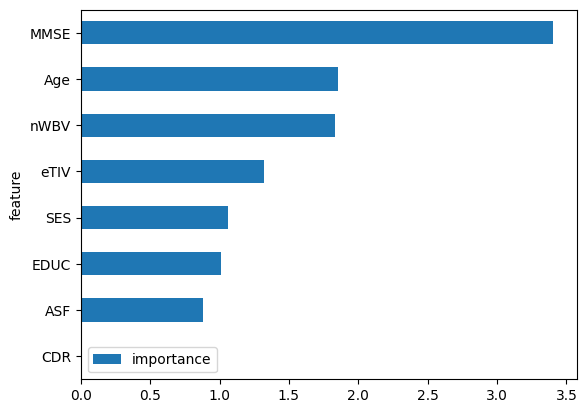

4    0.002894
7    0.257747
1    0.296294
2    0.311396
5    0.387364
6    0.537235
0    0.544508
3    1.000000
Name: importance, dtype: float64


In [ ]:
import math
feature_importance = pd.DataFrame(feature_names, columns = ["feature"])
feature_importance["importance"] = pow(math.e, w)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=True)
from sklearn.linear_model import LogisticRegression
ax = feature_importance.plot.barh(x='feature', y='importance')
plt.show()
print(feature_importance["importance"]/3.404147)

In [ ]:
df.drop(['SES', 'EDUC', 'ASF', 'CDR'], axis=1, inplace=True)

In [ ]:
df.describe().T #ASG

,count,mean,std,min,25%,50%,75%,max
Age,317.0,76.716088,7.805071,60.000,71.0,76.000,82.000,98.000
MMSE,317.0,27.261830,3.861227,4.000,27.0,29.000,30.000,30.000
eTIV,317.0,1493.577287,179.719079,1106.000,1358.0,1476.000,1599.000,2004.000
nWBV,317.0,0.730596,0.038102,0.644,0.7,0.732,0.757,0.837


In [ ]:
#CATEGORICAL FEATURES
#Encode Gender 
df.loc[df["Group"] == "Nondemented", "Group"] = 1 #nonDemented
df.loc[df["Group"] == "Demented", "Group"] = 0 #demented

#Encode Gender 
df.loc[df["M/F"] == "M", "M/F"] = 1 #Male
df.loc[df["M/F"] == "F", "M/F"] = 0 #Female

#NUMERICAL FEATURES
#encode Age
mean_age = df['Age'].mean()
print("Mean Age: ",round(mean_age, 2))
df.loc[df["Age"] < mean_age, "Age"] = 0 #ALTM age less than mean
df.loc[df["Age"] >= mean_age, "Age"] = 1 #AGTM

#encode MMSE
mean_MMSE = df['MMSE'].mean()
print("Mean MMSE: ",round(mean_MMSE, 2))
df.loc[df["MMSE"] < mean_MMSE, "MMSE"] = 0
df.loc[df["MMSE"] >= mean_MMSE, "MMSE"] = 1

# encode eTIV
mean_eTIV = df['eTIV'].mean()
print("Mean eTIV: ",round(mean_eTIV, 2))
df.loc[df["eTIV"] < mean_eTIV, "eTIV"] = 0
df.loc[df["eTIV"] >= mean_eTIV, "eTIV"] = 1

#encode nWBV
mean_nWBV = df['nWBV'].mean()
print("Mean nWBV: ",round(mean_nWBV, 2))
df.loc[df["nWBV"] < mean_nWBV, "nWBV"] = 0
df.loc[df["nWBV"] >= mean_nWBV, "nWBV"] = 1

#CONVERTING EACH INTO INT 
df['M/F'] = df['M/F'].astype(int)
# df['SES'] = df['SES'].astype(int)
df['MMSE'] = df['MMSE'].astype(int)
# df['CDR'] = df['CDR'].astype(int)
df['nWBV'] = df['nWBV'].astype(int)
# df['ASF'] = df['ASF'].astype(int)
df['Group'] = df['Group'].astype(int)
display(df.dtypes)

Mean Age:  76.72
Mean MMSE:  27.26
Mean eTIV:  1493.58
Mean nWBV:  0.73


Group    int64
M/F      int64
Age      int64
MMSE     int64
eTIV     int64
nWBV     int64
dtype: object

In [ ]:
df['total'] = 1
# df
pivot1= pd.pivot_table(df, index=['M/F', 'Age', 'MMSE', 'nWBV', 'eTIV'], aggfunc='sum')
# pivot.drop(['Group'], axis=1, inplace=True)
pivot1['y']= round(pivot1['Group']/pivot1['total'], 3)
pivot1

Group  total      y
M/F Age MMSE nWBV eTIV                     
0   0   0    0    0         0     11  0.000
                  1         0      1  0.000
             1    0         0      7  0.000
        1    0    0         3      4  0.750
                  1         5      6  0.833
             1    0        39     48  0.812
                  1        13     13  1.000
    1   0    0    0         2     15  0.133
                  1         0      3  0.000
             1    0         2      6  0.333
        1    0    0        22     23  0.957
                  1         5      5  1.000
             1    0        26     26  1.000
                  1        12     12  1.000
1   0   0    0    0         0      6  0.000
                  1         0     12  0.000
             1    0         2      5  0.400
                  1         0      4  0.000
        1    0    0         3      4  0.750
                  1         7     10  0.700
             1    0         6     10  0.600
                  1        12     18  0.667
    1   0    0    0         0     13  0.000
                  1         2     12  0.167
             1    1         2      6  0.333
        1    0    0         1      4  0.250
                  1        19     25  0.760
             1    0         0      1  0.000
                  1         7      7  1.000

In [ ]:
pivot1.drop(['Group', 'total'], axis=1, inplace=True)
pivot1

y
M/F Age MMSE nWBV eTIV       
0   0   0    0    0     0.000
                  1     0.000
             1    0     0.000
        1    0    0     0.750
                  1     0.833
             1    0     0.812
                  1     1.000
    1   0    0    0     0.133
                  1     0.000
             1    0     0.333
        1    0    0     0.957
                  1     1.000
             1    0     1.000
                  1     1.000
1   0   0    0    0     0.000
                  1     0.000
             1    0     0.400
                  1     0.000
        1    0    0     0.750
                  1     0.700
             1    0     0.600
                  1     0.667
    1   0    0    0     0.000
                  1     0.167
             1    1     0.333
        1    0    0     0.250
                  1     0.760
             1    0     0.000
                  1     1.000

-------------------------------------------------------------------------------- **THE END ** ------------------------------------------------------------------------------------------------------------



